# Propeht

# ARIMA

## Setting

In [10]:
train_end <- '2019-12-31'

test_start <- '2020-01-01'
test_end <- '2020-12-31'

train <- window(spx, end=c(as.Date(train_end)))
test <- window(spx, start=c(as.Date(test_start)), end=c(as.Date(test_end)))

In [11]:
hori <- 252
peri <- floor(hori/2)
w <- 252*5

## Model 1

In [12]:
cv.forecast <- function(x, h) {
    forecast(auto.arima(x, trace=TRUE, ic='aicc', seasonal=FALSE, 
                        #allowdrift=TRUE, allowmean = TRUE, # default
                        lambda="auto"), h=h)
}

In [13]:
results.m01 <- my.tsCV(train, cv.forecast, h=hori, window=w, step=peri)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : 9452.873
 ARIMA(0,1,0) with drift         : 9449.174
 ARIMA(1,1,0) with drift         : 9449.483
 ARIMA(0,1,1) with drift         : 9451.06
 ARIMA(0,1,0)                    : 9455.61
 ARIMA(1,1,1) with drift         : 9449.018
 ARIMA(2,1,1) with drift         : Inf
 ARIMA(1,1,2) with drift         : Inf
 ARIMA(0,1,2) with drift         : 9452.861
 ARIMA(2,1,0) with drift         : 9452.185
 ARIMA(1,1,1)                    : 9456.8

 Now re-fitting the best model(s) without approximations...

 ARIMA(1,1,1) with drift         : 9455.604

 Best model: ARIMA(1,1,1) with drift         

[1] "2 % done."

 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : -8721.787
 ARIMA(0,1,0) with drift         : -8720.878
 ARIMA(1,1,0) with drift         : -8722.636
 ARIMA(0,1,1) with drift         : -8720.169
 ARIMA(0,1,0)                    : -8716.05
 ARIMA(2,1,0) 

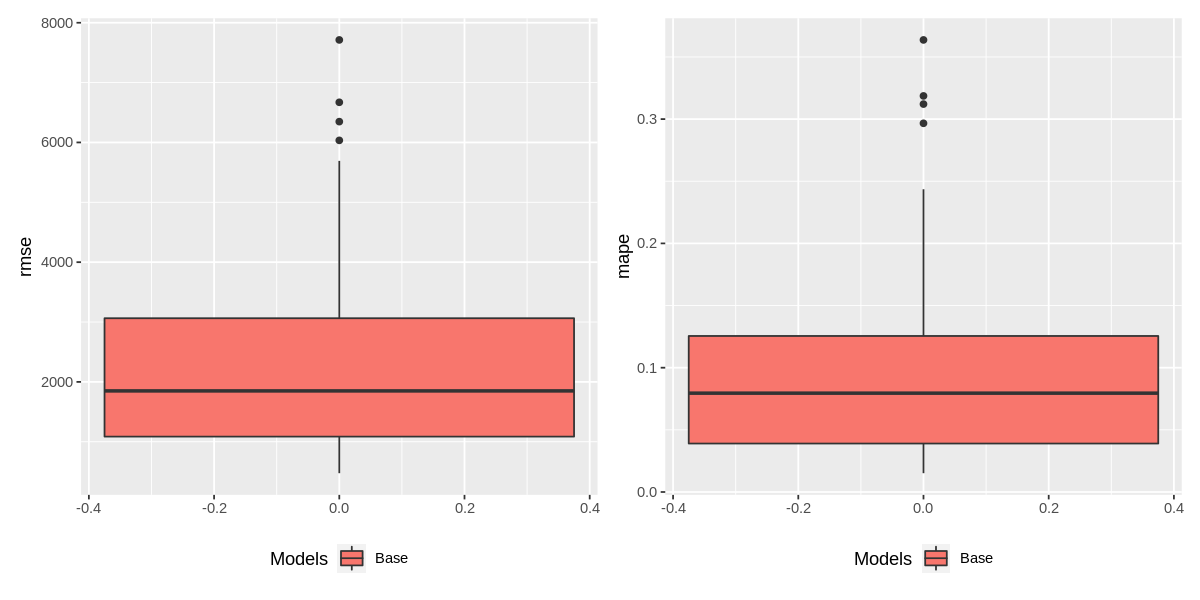

In [14]:
m1.r1 <- n.get_result(results.m01, 'Base')
n.plot_errors(m1.r1)

### Compare with Normalization

In [19]:
train1n <- my.minmaxscale(train)
head(train1n)

           GSPC.Adjusted
1991-01-02    -0.6642147
1991-01-03    -0.6673153
1991-01-04    -0.6679368
1991-01-07    -0.6717339
1991-01-08    -0.6721027
1991-01-09    -0.6744315

In [20]:
results.m01 <- my.tsCV(train1n, cv.forecast, h=hori, window=w, step=peri)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : -13521.81
 ARIMA(0,1,0) with drift         : -13523.5
 ARIMA(1,1,0) with drift         : -13524.38
 ARIMA(0,1,1) with drift         : -13521.66
 ARIMA(0,1,0)                    : -13517.76
 ARIMA(2,1,0) with drift         : -13521.88
 ARIMA(1,1,1) with drift         : -13525.34
 ARIMA(2,1,1) with drift         : Inf
 ARIMA(1,1,2) with drift         : Inf
 ARIMA(0,1,2) with drift         : -13520.03
 ARIMA(1,1,1)                    : -13518.45

 Now re-fitting the best model(s) without approximations...

 ARIMA(1,1,1) with drift         : -13535.26

 Best model: ARIMA(1,1,1) with drift         

[1] "2 % done."

 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : -13547.9
 ARIMA(0,1,0) with drift         : -13548.54
 ARIMA(1,1,0) with drift         : -13549.77
 ARIMA(0,1,1) with drift         : -13547.86
 ARIMA(0,1,0)                    : -13543.35
 

Normalized result shows smaller rmse & more mape than base result since abs values scaled to less than 1

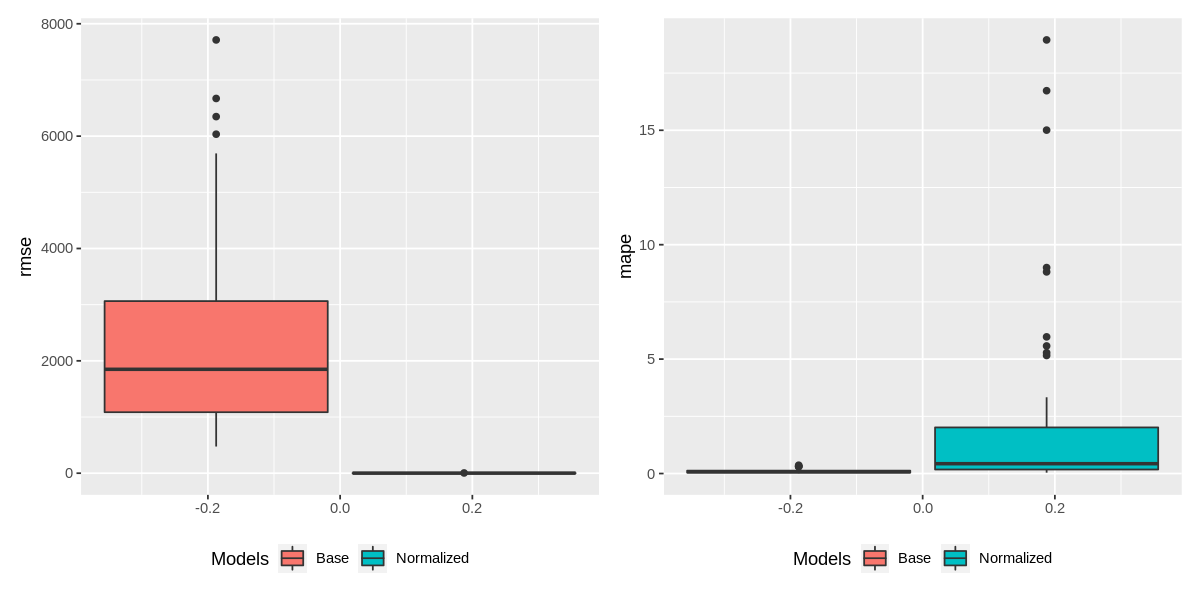

In [21]:
m1.r2 <- n.get_result(results.m01, 'Normalized')

results.tmp <- rbind(m1.r1, m1.r2)
n.plot_errors(results.tmp)

We will compare results from normalized data from now on

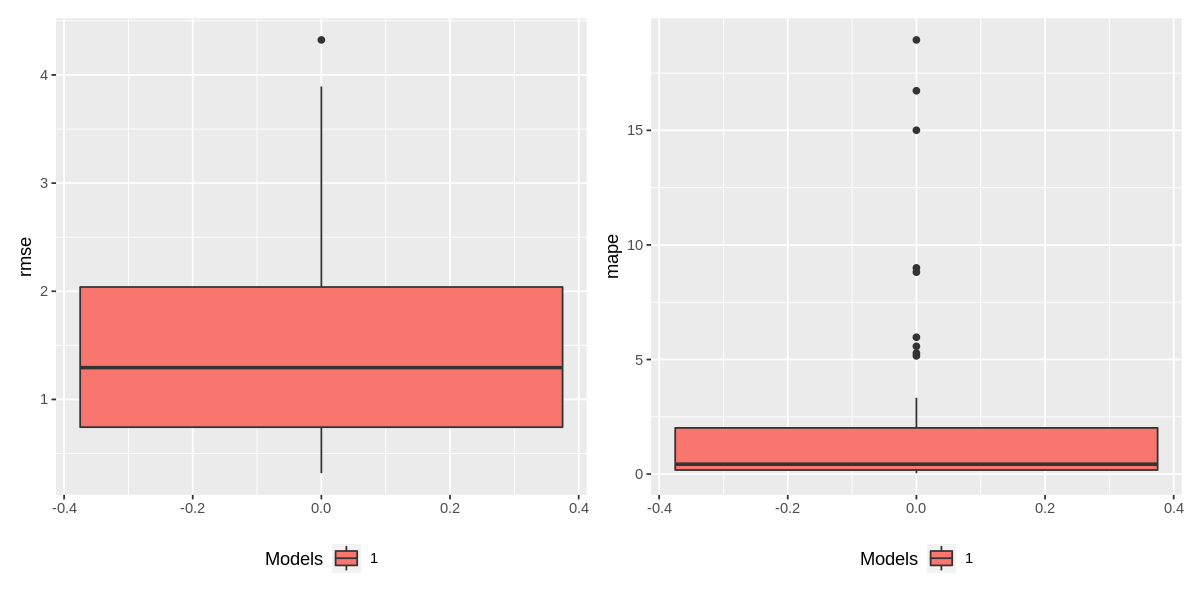

In [26]:
m1.r2$cs <- 1
results <- m1.r2
#n.plot_errors(results, metrics=c('rmse'))
n.plot_errors(results)

## Model 2
- Regression with ARIMA errors in R

### Prepare Regression Data

In [57]:
head(GSPC)

           GSPC.Open GSPC.High GSPC.Low GSPC.Close GSPC.Volume GSPC.Adjusted
1991-01-02    330.20    330.75   326.45     326.45   126280000        326.45
1991-01-03    326.46    326.53   321.90     321.91   141450000        321.91
1991-01-04    321.91    322.35   318.87     321.00   140820000        321.00
1991-01-07    320.97    320.97   315.44     315.44   130610000        315.44
1991-01-08    315.44    316.97   313.79     314.90   143390000        314.90
1991-01-09    314.90    320.73   310.93     311.49   191100000        311.49

In [58]:
vol <- GSPC$GSPC.Volume
#vol.train <- vol

In [59]:
#window(spx, start=c(as.Date(test_start)), end=c(as.Date(test_end)))

In [60]:
head(train)

           GSPC.Adjusted
1991-01-02        326.45
1991-01-03        321.91
1991-01-04        321.00
1991-01-07        315.44
1991-01-08        314.90
1991-01-09        311.49

In [61]:
#class(train[1,0]); class(train)

#index(train)

train2 <- merge(train, vol, join='left', fill=NA)
colnames(train2) <- c('snp.close','snp.vol')

colSums(is.na(train2))
head(train2)

snp.close   snp.vol 
        0         0

           snp.close   snp.vol
1991-01-02    326.45 126280000
1991-01-03    321.91 141450000
1991-01-04    321.00 140820000
1991-01-07    315.44 130610000
1991-01-08    314.90 143390000
1991-01-09    311.49 191100000

#### Normalization

In [62]:
train2n <- my.minmaxscale(train2)
head(train2n)

            snp.close    snp.vol
1991-01-02 -0.6642147 -0.3724518
1991-01-03 -0.6673153 -0.3697999
1991-01-04 -0.6679368 -0.3699101
1991-01-07 -0.6717339 -0.3716948
1991-01-08 -0.6721027 -0.3694608
1991-01-09 -0.6744315 -0.3611208

### Check Correlation

#### OLS

In [25]:
a <- train2n[,1]
b <- train2n[,2]

In [26]:
reg <- lm(a~b)
summary(reg)


Call:
lm(formula = a ~ b)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.56941 -0.27841 -0.02718  0.19457  1.44954 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.211e-16  4.425e-03    0.00        1    
b           8.061e-01  1.449e-02   55.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3782 on 7304 degrees of freedom
Multiple R-squared:  0.2976,	Adjusted R-squared:  0.2975 
F-statistic:  3095 on 1 and 7304 DF,  p-value: < 2.2e-16


#### Generalized Least Squares

run failed

In [48]:
reg.2 <- gls(a~b, correlation=corARMA(p=1,q=0), method='ML')
summary(reg.2)

ERROR: Error in `dimnames<-.xts`(`*tmp*`, value = dn): length of 'dimnames' [2] not equal to array extent


run forever

In [ ]:
reg.3 <- gls(a~b, correlation=corARMA(p=1,q=1), method='ML')
summary(reg.3)

### Define Forecast Function 
- to include regression data

In [63]:
cv.forecast <- function(x, h, xreg=NULL) {
    if (!is.null(xreg)) {
        xreg.h <- rep(mean(xreg),h)
        xreg.h <- data.frame(xreg.h)
        colnames(xreg.h) <- colnames(xreg)
        xreg.h <- ts(xreg.h)
    } else {
        xreg.h <- NULL
    }
    
    forecast(auto.arima(x, trace=TRUE, ic='aicc', seasonal=FALSE, 
                        xreg=xreg, lambda="auto"), h=h, xreg=xreg.h)
}

#### Testing the fucntion

In [18]:
x.train <- window(train2, end=c(as.Date('1995-12-31')))
x.test <- window(train2, start=c(as.Date('1996-01-01')), end=c(as.Date('1996-12-31')))
c.train <- x.train$snp.close
r <- x.train$snp.vol
c.test <- x.test$snp.close

fc1 <- cv.forecast(c.train, 252, NULL)
fc2 <- cv.forecast(c.train, 252, r)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : 9645.052
 ARIMA(0,1,0) with drift         : 9641.368
 ARIMA(1,1,0) with drift         : 9641.68
 ARIMA(0,1,1) with drift         : 9643.25
 ARIMA(0,1,0)                    : 9648.057
 ARIMA(1,1,1) with drift         : 9641.213
 ARIMA(2,1,1) with drift         : Inf
 ARIMA(1,1,2) with drift         : Inf
 ARIMA(0,1,2) with drift         : 9645.021
 ARIMA(2,1,0) with drift         : 9644.356
 ARIMA(1,1,1)                    : 9649.269

 Now re-fitting the best model(s) without approximations...

 ARIMA(1,1,1) with drift         : 9647.924

 Best model: ARIMA(1,1,1) with drift         


 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : 9634.695
 Regression with ARIMA(0,1,0) errors : Inf
 Regression with ARIMA(1,1,0) errors : 9631.441
 Regression with ARIMA(0,1,1) errors : 9633.136
 Regression with ARIMA(0,1,0) errors : 9637.89
 Regression with A

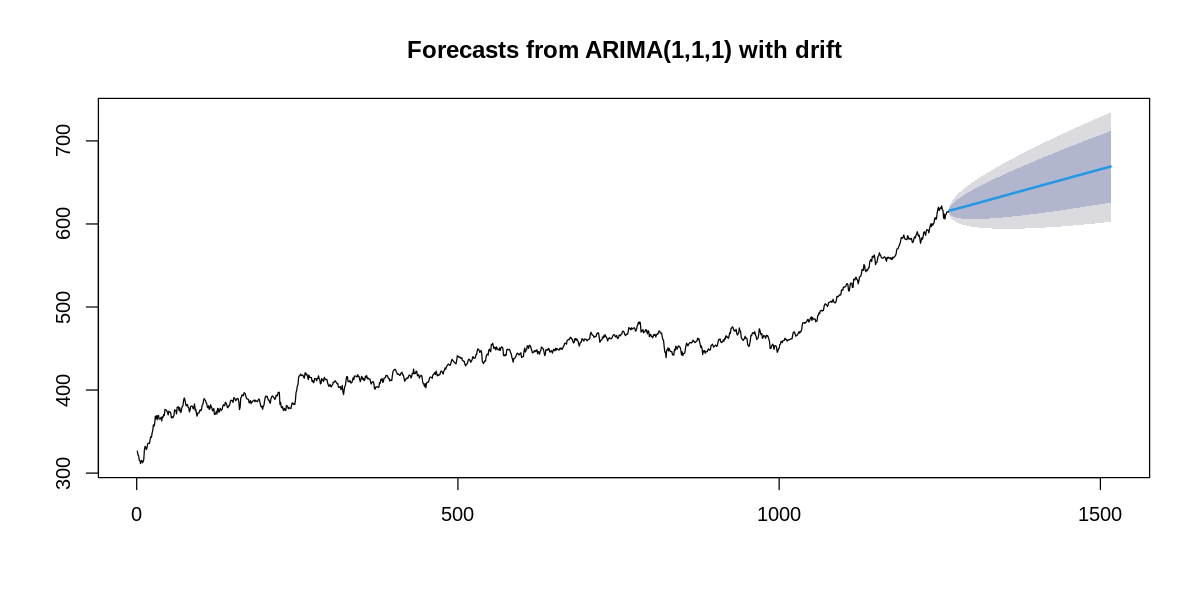

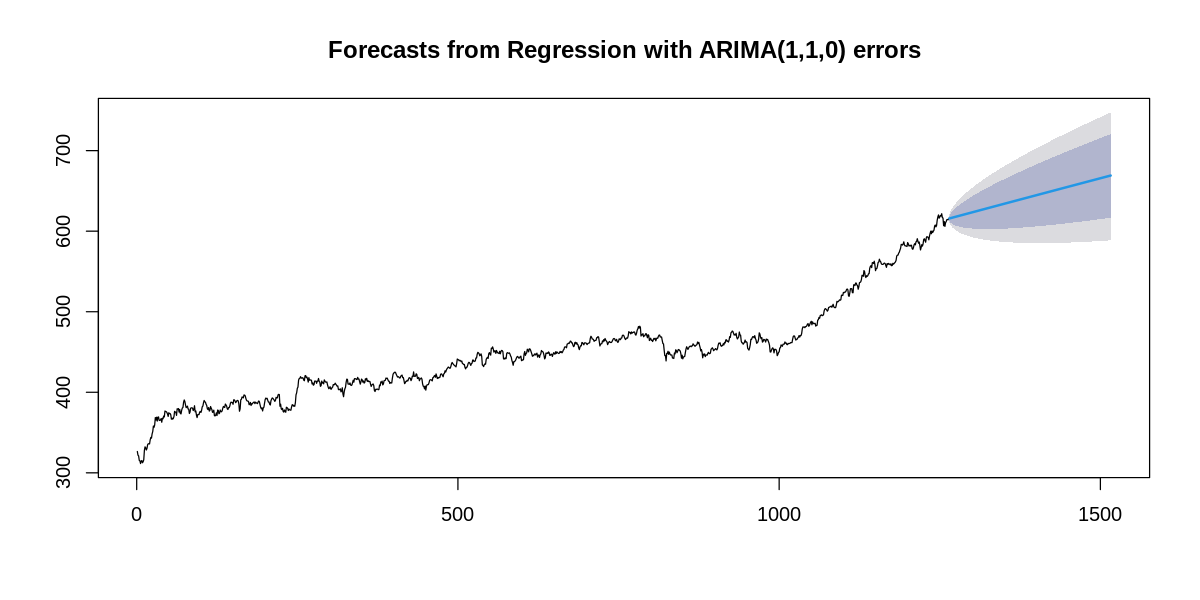

In [19]:
#par(mfrow=c(2,1))
plot(fc1)
plot(fc2)

### CV

In [64]:
results.m02 <- my.tsCV(train2n$snp.close, cv.forecast, h=hori, window=w, step=peri,
                      xreg=train2n$snp.vol)


 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : -13532.4
 Regression with ARIMA(0,1,0) errors : -13533.8
 Regression with ARIMA(1,1,0) errors : -13534.75
 Regression with ARIMA(0,1,1) errors : -13531.87
 Regression with ARIMA(0,1,0) errors : -13528.05
 Regression with ARIMA(2,1,0) errors : -13532.76
 Regression with ARIMA(1,1,1) errors : -13535.78
 Regression with ARIMA(2,1,1) errors : Inf
 Regression with ARIMA(1,1,2) errors : Inf
 Regression with ARIMA(0,1,2) errors : -13530.76
 Regression with ARIMA(1,1,1) errors : -13528.92

 Now re-fitting the best model(s) without approximations...

 Regression with ARIMA(1,1,1) errors : -13545.57

 Best model: Regression with ARIMA(1,1,1) errors 

[1] "2 % done."

 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : -13547.05
 Regression with ARIMA(0,1,0) errors : -13547.82
 Regression with ARIMA(1,1,0) errors : -13548.97
 Regression with ARIMA(0,1,

In [65]:
m2.r1 <- n.get_result(results.m02, 2)

In [36]:
results <- rbind(results, m2.r1)

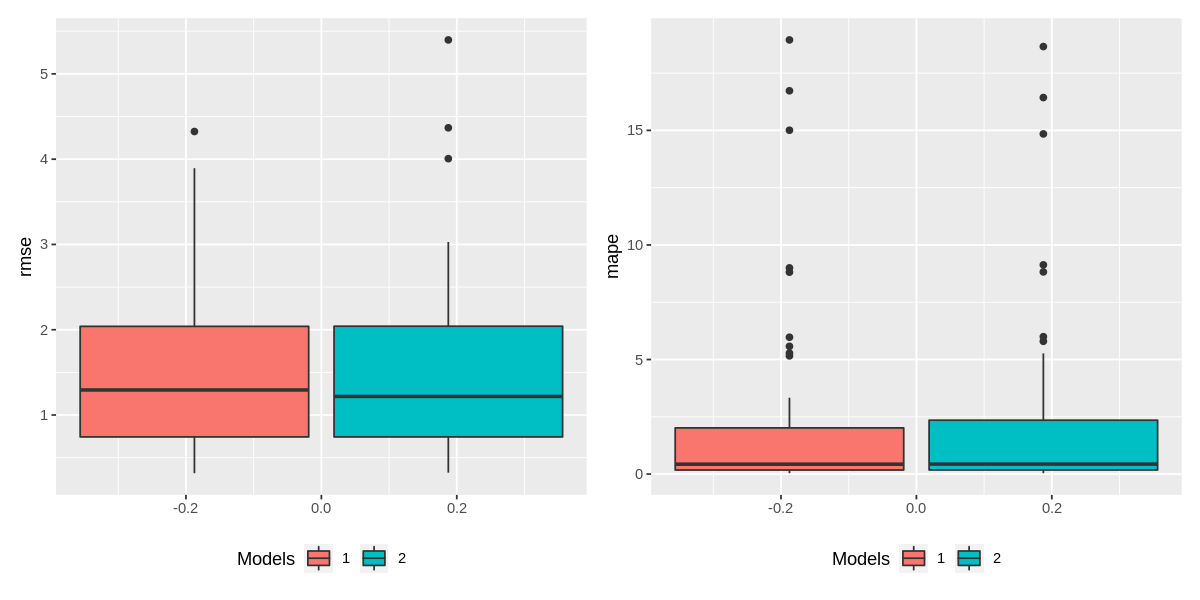

In [37]:
n.plot_errors(results)

## Model 3
- Regression with ARIMA errors in R
- multiple vars for regression

### Prepare Regression Data

S&P 500 Volume

In [83]:
vol <- GSPC$GSPC.Volume

#### Nasdaq Composite

In [84]:
n.symbol <- "^IXIC"
nas <- getSymbols(n.symbol, from=n.start, to=n.end, auto.assign = FALSE)
head(nas); tail(nas)

           IXIC.Open IXIC.High IXIC.Low IXIC.Close IXIC.Volume IXIC.Adjusted
1991-01-02     373.0     373.5    371.8      372.2    92020000         372.2
1991-01-03     371.2     371.8    367.4      367.5   108390000         367.5
1991-01-04     366.5     367.9    365.9      367.2   103830000         367.2
1991-01-07     363.5     365.8    360.1      360.2   109460000         360.2
1991-01-08     359.1     360.5    358.2      359.0   111730000         359.0
1991-01-09     362.4     365.0    357.1      357.5   145780000         357.5

           IXIC.Open IXIC.High IXIC.Low IXIC.Close IXIC.Volume IXIC.Adjusted
2020-12-22  12785.22  12840.57 12695.31   12807.92  5700760000      12807.92
2020-12-23  12834.94  12841.92 12758.67   12771.11  7028650000      12771.11
2020-12-24  12791.54  12833.55 12767.64   12804.73  3305950000      12804.73
2020-12-28  12914.64  12930.89 12827.45   12899.42  5076340000      12899.42
2020-12-29  12965.39  12973.33 12821.96   12850.22  4680780000      12850.22
2020-12-30  12906.51  12924.93 12857.76   12870.00  5292210000      12870.00

In [85]:
nas.adj <- nas$IXIC.Adjusted
sum(is.na(nas.adj))

[1] 0

#### Gold

In [86]:
library(Quandl)

n.symbol <- "LBMA/GOLD"
gold <- Quandl(n.symbol, start_date=n.start, end_date=n.end, order='asc', type='xts')
head(gold); tail(gold)

           USD (AM) USD (PM) GBP (AM) GBP (PM) EURO (AM) EURO (PM)
1991-01-02   392.50    390.8   202.48   200.93        NA        NA
1991-01-03   386.75    386.3   198.74   198.43        NA        NA
1991-01-04   388.10    387.4   199.35   199.85        NA        NA
1991-01-07   391.00    391.1   205.25   205.54        NA        NA
1991-01-08   392.80    389.7   206.19   204.55        NA        NA
1991-01-09   390.70    387.1   205.38   201.35        NA        NA

           USD (AM) USD (PM) GBP (AM) GBP (PM) EURO (AM) EURO (PM)
2020-12-22  1873.30   1877.1  1399.73  1405.95   1532.73   1538.10
2020-12-23  1867.10   1875.0  1390.06  1382.44   1532.14   1535.06
2020-12-24  1872.55       NA  1376.14       NA   1535.87        NA
2020-12-29  1873.90   1874.3  1388.93  1389.42   1529.66   1528.49
2020-12-30  1877.55   1887.6  1381.31  1387.39   1528.89   1535.19
2020-12-31  1891.10       NA  1382.58       NA   1539.92        NA

In [87]:
gold.usdam <- gold[,1]
sum(is.na(gold.usdam))

[1] 0

#### WTI

In [88]:
n.symbol <- "DCOILWTICO"
# from & end do not work with src "FRED"
wti <- getSymbols(n.symbol, auto.assign = FALSE, from=n.start, to=n.end, src = "FRED")
wti <- window(wti, start=n.start, end=n.end)
head(wti); tail(wti)

           DCOILWTICO
1991-01-01         NA
1991-01-02      26.53
1991-01-03      25.61
1991-01-04      24.88
1991-01-07      27.25
1991-01-08      27.50

           DCOILWTICO
2020-12-24      48.18
2020-12-25         NA
2020-12-28      47.50
2020-12-29      47.85
2020-12-30      48.24
2020-12-31      48.35

In [89]:
wti[wti<0]
window(wti, start='2020-04-15', end='2020-04-25')

           DCOILWTICO
2020-04-20     -36.98

           DCOILWTICO
2020-04-15      19.96
2020-04-16      19.82
2020-04-17      18.31
2020-04-20     -36.98
2020-04-21       8.91
2020-04-22      13.64
2020-04-23      15.06
2020-04-24      15.99

In [90]:
wti['2020-04-20'] <- 0
wti[wti<0]

     DCOILWTICO

In [91]:
train2 <- merge(train, vol, join='left', fill=NA)
colnames(train2) <- c('snp.close','snp.vol')

colSums(is.na(train2))
head(train2)

snp.close   snp.vol 
        0         0

           snp.close   snp.vol
1991-01-02    326.45 126280000
1991-01-03    321.91 141450000
1991-01-04    321.00 140820000
1991-01-07    315.44 130610000
1991-01-08    314.90 143390000
1991-01-09    311.49 191100000

#### Combine Data

In [92]:
train2 <- merge(train, vol, join='left', fill=NA)
train2 <- merge(train2, nas.adj, join='left', fill=NA)
train2 <- merge(train2, gold.usdam, join='left', fill=NA)
train2 <- merge(train2, wti, join='left', fill=NA)

colnames(train2) <- c('snp.close','snp.vol','nasdaq','gold','wti')

colSums(is.na(train2))
head(train2)

snp.close   snp.vol    nasdaq      gold       wti 
        0         0         0       130        28

           snp.close   snp.vol nasdaq   gold   wti
1991-01-02    326.45 126280000  372.2 392.50 26.53
1991-01-03    321.91 141450000  367.5 386.75 25.61
1991-01-04    321.00 140820000  367.2 388.10 24.88
1991-01-07    315.44 130610000  360.2 391.00 27.25
1991-01-08    314.90 143390000  359.0 392.80 27.50
1991-01-09    311.49 191100000  357.5 390.70 28.00

In [93]:
colSums(is.na(train2))

snp.close   snp.vol    nasdaq      gold       wti 
        0         0         0       130        28

In [94]:
tail(train2[is.na(train2$gold)])
tail(train2[is.na(train2$wti)])

           snp.close    snp.vol  nasdaq gold   wti
2018-08-27   2896.74 2854080000 8017.90   NA 69.97
2018-12-26   2467.70 4233990000 6554.36   NA 46.04
2019-04-22   2907.97 2997950000 8015.27   NA 65.66
2019-05-06   2932.47 3181520000 8123.29   NA 62.30
2019-08-26   2878.38 2857600000 7853.74   NA 53.54
2019-12-26   3239.91 2160680000 9022.39   NA 61.72

           snp.close    snp.vol  nasdaq    gold wti
2017-07-03   2429.01 1962290000 6110.06 1235.20  NA
2018-11-23   2632.56 1651650000 6938.98 1222.15  NA
2018-12-24   2351.10 2613930000 6192.92 1261.25  NA
2018-12-31   2506.85 3442870000 6635.28 1281.65  NA
2019-07-05   2990.41 2434210000 8161.79 1414.40  NA
2019-11-11   3087.01 3035530000 8464.28 1465.50  NA

In [95]:
window(train2, start='2019-12-20', end='2020-01-01')
window(train2, start='2019-11-03', end='2019-11-15')

           snp.close    snp.vol  nasdaq    gold   wti
2019-12-20   3221.22 6454270000 8924.96 1476.90 60.43
2019-12-23   3224.01 3060610000 8945.65 1483.95 60.51
2019-12-24   3223.38 1296540000 8952.88 1490.85 61.17
2019-12-26   3239.91 2160680000 9022.39      NA 61.72
2019-12-27   3240.02 2428670000 9006.62 1510.60 61.76
2019-12-30   3221.29 3013290000 8945.99 1511.50 61.66
2019-12-31   3230.78 2893810000 8972.60 1523.00 61.14

           snp.close    snp.vol  nasdaq    gold   wti
2019-11-04   3078.27 4146850000 8433.20 1509.20 56.33
2019-11-05   3074.62 4486130000 8434.68 1504.60 57.04
2019-11-06   3076.78 4458190000 8410.63 1488.55 56.15
2019-11-07   3085.18 4144640000 8434.52 1484.10 56.91
2019-11-08   3093.08 3499150000 8475.31 1466.85 57.02
2019-11-11   3087.01 3035530000 8464.28 1465.50    NA
2019-11-12   3091.84 3466010000 8486.09 1455.00 56.67
2019-11-13   3094.04 3509280000 8482.10 1463.45 56.88
2019-11-14   3096.63 3276070000 8479.02 1467.65 56.57
2019-11-15   3120.46 3335650000 8540.83 1465.60 57.54

In [96]:
train2 <- na.locf(train2)

In [97]:
window(train2, start='2019-12-20', end='2020-01-01')
window(train2, start='2019-11-03', end='2019-11-15')

           snp.close    snp.vol  nasdaq    gold   wti
2019-12-20   3221.22 6454270000 8924.96 1476.90 60.43
2019-12-23   3224.01 3060610000 8945.65 1483.95 60.51
2019-12-24   3223.38 1296540000 8952.88 1490.85 61.17
2019-12-26   3239.91 2160680000 9022.39 1490.85 61.72
2019-12-27   3240.02 2428670000 9006.62 1510.60 61.76
2019-12-30   3221.29 3013290000 8945.99 1511.50 61.66
2019-12-31   3230.78 2893810000 8972.60 1523.00 61.14

           snp.close    snp.vol  nasdaq    gold   wti
2019-11-04   3078.27 4146850000 8433.20 1509.20 56.33
2019-11-05   3074.62 4486130000 8434.68 1504.60 57.04
2019-11-06   3076.78 4458190000 8410.63 1488.55 56.15
2019-11-07   3085.18 4144640000 8434.52 1484.10 56.91
2019-11-08   3093.08 3499150000 8475.31 1466.85 57.02
2019-11-11   3087.01 3035530000 8464.28 1465.50 57.02
2019-11-12   3091.84 3466010000 8486.09 1455.00 56.67
2019-11-13   3094.04 3509280000 8482.10 1463.45 56.88
2019-11-14   3096.63 3276070000 8479.02 1467.65 56.57
2019-11-15   3120.46 3335650000 8540.83 1465.60 57.54

#### Normalization

In [98]:
train2n <- my.minmaxscale(train2)
head(train2n)

            snp.close    snp.vol     nasdaq       gold        wti
1991-01-02 -0.6642147 -0.3724518 -0.5503244 -0.4390499 -0.3275023
1991-01-03 -0.6673153 -0.3697999 -0.5514090 -0.4460702 -0.3411836
1991-01-04 -0.6679368 -0.3699101 -0.5514782 -0.4444220 -0.3520395
1991-01-07 -0.6717339 -0.3716948 -0.5530936 -0.4408813 -0.3167952
1991-01-08 -0.6721027 -0.3694608 -0.5533706 -0.4386836 -0.3130775
1991-01-09 -0.6744315 -0.3611208 -0.5537167 -0.4412476 -0.3056420

#### Check Correlation

In [99]:
c <- colnames(train2n)
a <- train2n[,1]

for (i in 2:5) {
    b <- train2n[,i]
    reg <- lm(a~b)
    s <- summary(reg)
    s1 <- s$sigma
    s2 <- s$adj.r.squared
    s3 <- pf(s$fstatistic[1],s$fstatistic[2],s$fstatistic[3], lower.tail=FALSE)
    sn <- sprintf("%-7s >> Res.SE: %.3f, Adj.R^2: %.3f, F-stat p-val: %.3e", c[i], s1, s2, s3)
    print(sn)
}

[1] "snp.vol >> Res.SE: 0.378, Adj.R^2: 0.298, F-stat p-val: 0.000e+00"
[1] "nasdaq  >> Res.SE: 0.086, Adj.R^2: 0.963, F-stat p-val: 0.000e+00"
[1] "gold    >> Res.SE: 0.338, Adj.R^2: 0.438, F-stat p-val: 0.000e+00"
[1] "wti     >> Res.SE: 0.403, Adj.R^2: 0.204, F-stat p-val: 0.000e+00"


### Define Forecast Function 
- include multiple regression data

In [106]:
cv.forecast <- function(x, h, xreg=NULL, xreg.msize=NULL) {
    if (!is.null(xreg)) {
        
        if (is.null(xreg.msize)) {
            xreg.m <- xreg # calc mean for future with all the xreg
        } else {
            # calc mean for future with xreg of length xreg.mszie
            xreg.m <- tail(xreg, n=xreg.msize)
        }
        
        if (is.null(dim(xreg))) {
            xreg.h <- mean(xreg.m)
        } else {
            xreg.h <- colMeans(xreg.m)  
        }
        
        xreg.h <- data.frame(xreg.h)
        #colnames(xreg.h) <- colnames(NA)
        colnames(xreg.h) <- colnames(xreg)
        xreg.h <- t(xreg.h)
        xreg.h <- as.ts(xreg.h[rep(seq_len(nrow(xreg.h)), h), ])
        
    } else {
        xreg.h <- NULL
    }
    
    print(head(xreg.h)) # testing
    
    forecast(auto.arima(x, trace=TRUE, ic='aicc', seasonal=FALSE, 
                        xreg=xreg, lambda="auto"), h=h, xreg=xreg.h)
}

##### Debugging

In [100]:
x.train <- window(train2, end=c(as.Date('1995-12-31')))
x.test <- window(train2, start=c(as.Date('1996-01-01')), end=c(as.Date('1996-12-31')))
c.train <- x.train$snp.close

#r <- x.train$snp.vol
r <- x.train[,2:4]

c.test <- x.test$snp.close

#fc1 <- cv.forecast(c.train, 252, r, NULL)

In [103]:


x <- x.train
h <- 252
xreg <- r
xreg.msize <- NULL

if (!is.null(xreg)) {

    if (is.null(xreg.msize)) {
        xreg.m <- xreg # calc mean for future with all the xreg
    } else {
        # calc mean for future with xreg of length xreg.mszie
        xreg.m <- tail(xreg, n=xreg.msize)
    }

    if (is.null(dim(xreg))) {
        xreg.h <- mean(xreg.m)
    } else {
        xreg.h <- colMeans(xreg.m)  
    }

    xreg.h <- data.frame(xreg.h)
    colnames(xreg.h) <- colnames(NA)
    #colnames(xreg.h) <- colnames(xreg)
    xreg.h <- t(xreg.h)
    xreg.h <- as.ts(xreg.h[rep(seq_len(nrow(xreg.h)), h), ])

} else {
    xreg.h <- NULL
}

head(xreg)
head(xreg.h)

             snp.vol nasdaq   gold
1991-01-02 126280000  372.2 392.50
1991-01-03 141450000  367.5 386.75
1991-01-04 140820000  367.2 388.10
1991-01-07 130610000  360.2 391.00
1991-01-08 143390000  359.0 392.80
1991-01-09 191100000  357.5 390.70

,snp.vol,nasdaq,gold
1,256580008,696.2869,366.8277
2,256580008,696.2869,366.8277
3,256580008,696.2869,366.8277
4,256580008,696.2869,366.8277
5,256580008,696.2869,366.8277
6,256580008,696.2869,366.8277


In [105]:
head(xreg.h[,1])

A Time Series:
[1] 256580008 256580008 256580008 256580008 256580008 256580008

#### Testing the function
- to check new cv.forecast works fine with single xreg

In [55]:
xreg <- train2n[,'snp.vol']
results.m03 <- my.tsCV(train2n[,1], cv.forecast, h=hori, window=w, step=peri,
                       xreg=xreg)
m3.r1 <- n.get_result(results.m03, 'testing')


 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : -13532.4
 Regression with ARIMA(0,1,0) errors : -13533.8
 Regression with ARIMA(1,1,0) errors : -13534.75
 Regression with ARIMA(0,1,1) errors : -13531.87
 Regression with ARIMA(0,1,0) errors : -13528.05
 Regression with ARIMA(2,1,0) errors : -13532.76
 Regression with ARIMA(1,1,1) errors : -13535.78
 Regression with ARIMA(2,1,1) errors : Inf
 Regression with ARIMA(1,1,2) errors : Inf
 Regression with ARIMA(0,1,2) errors : -13530.76
 Regression with ARIMA(1,1,1) errors : -13528.92

 Now re-fitting the best model(s) without approximations...

 Regression with ARIMA(1,1,1) errors : -13545.57

 Best model: Regression with ARIMA(1,1,1) errors 

[1] "2 % done."

 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : -13547.05
 Regression with ARIMA(0,1,0) errors : -13547.82
 Regression with ARIMA(1,1,0) errors : -13548.97
 Regression with ARIMA(0,1,

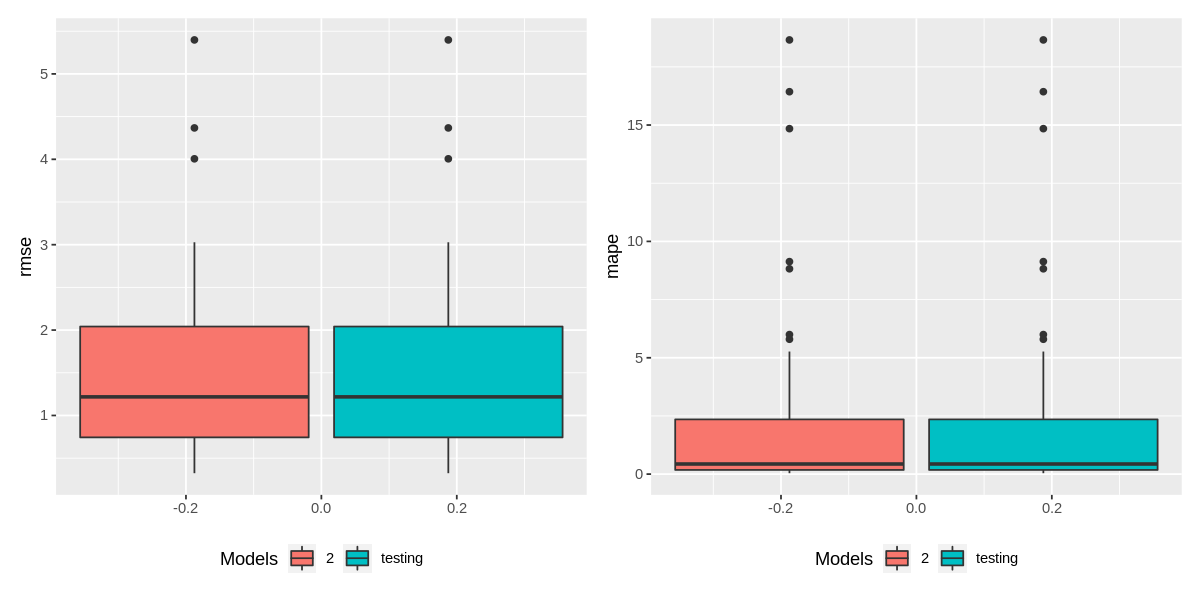

In [66]:
n.plot_errors(rbind(m2.r1, m3.r1))

#### Data length to calc mean of xreg for prediction

In [67]:
results.m03 <- my.tsCV(train2n[,1], cv.forecast, h=hori, window=w, step=peri,
                       xreg=xreg, xreg.mize=hori)
m3.r1s <- n.get_result(results.m03, 'testing2')


 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : -13532.4
 Regression with ARIMA(0,1,0) errors : -13533.8
 Regression with ARIMA(1,1,0) errors : -13534.75
 Regression with ARIMA(0,1,1) errors : -13531.87
 Regression with ARIMA(0,1,0) errors : -13528.05
 Regression with ARIMA(2,1,0) errors : -13532.76
 Regression with ARIMA(1,1,1) errors : -13535.78
 Regression with ARIMA(2,1,1) errors : Inf
 Regression with ARIMA(1,1,2) errors : Inf
 Regression with ARIMA(0,1,2) errors : -13530.76
 Regression with ARIMA(1,1,1) errors : -13528.92

 Now re-fitting the best model(s) without approximations...

 Regression with ARIMA(1,1,1) errors : -13545.57

 Best model: Regression with ARIMA(1,1,1) errors 

[1] "2 % done."

 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : -13547.05
 Regression with ARIMA(0,1,0) errors : -13547.82
 Regression with ARIMA(1,1,0) errors : -13548.97
 Regression with ARIMA(0,1,

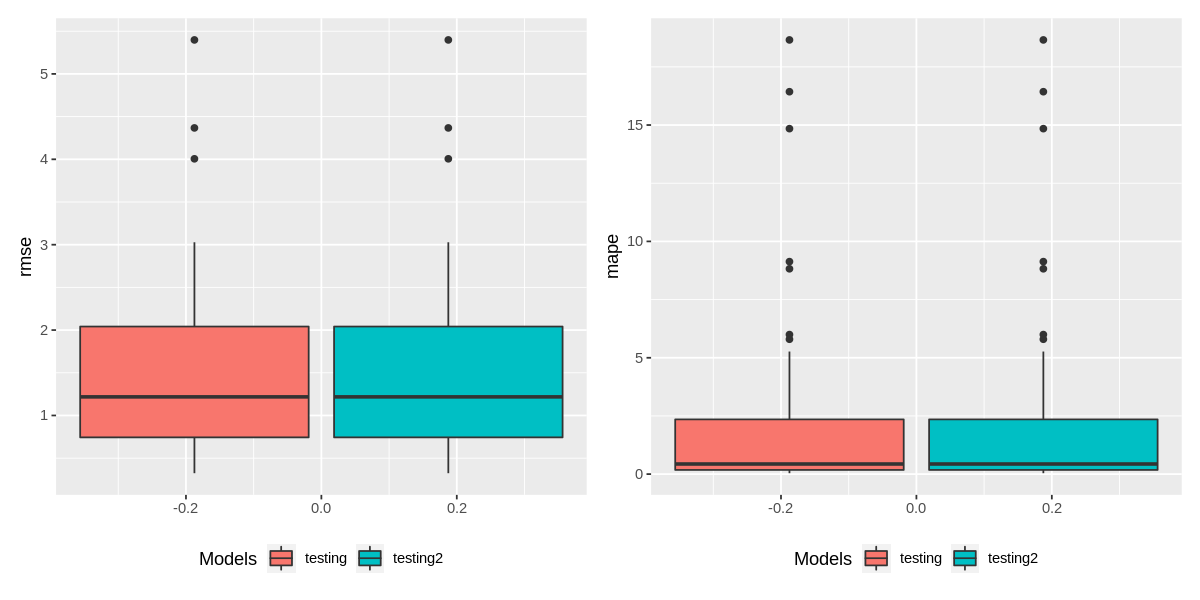

In [68]:
n.plot_errors(rbind(m3.r1, m3.r1s))

In [107]:
x.train <- window(train2, end=c(as.Date('1995-12-31')))
x.test <- window(train2, start=c(as.Date('1996-01-01')), end=c(as.Date('1996-12-31')))
c.train <- x.train$snp.close
r <- x.train$snp.vol
c.test <- x.test$snp.close

fc1 <- cv.forecast(c.train, 252, r, NULL)
fc2 <- cv.forecast(c.train, 252, r, 252)

Time Series:
Start = 1 
End = 6 
Frequency = 1 
[1] 256580008 256580008 256580008 256580008 256580008 256580008

 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : 9634.695
 Regression with ARIMA(0,1,0) errors : Inf
 Regression with ARIMA(1,1,0) errors : 9631.441
 Regression with ARIMA(0,1,1) errors : 9633.136
 Regression with ARIMA(0,1,0) errors : 9637.89
 Regression with ARIMA(2,1,0) errors : 9633.738
 Regression with ARIMA(1,1,1) errors : Inf
 Regression with ARIMA(2,1,1) errors : Inf
 Regression with ARIMA(1,1,0) errors : Inf

 Now re-fitting the best model(s) without approximations...

 Regression with ARIMA(1,1,0) errors : 9637.927

 Best model: Regression with ARIMA(1,1,0) errors 



Warning message in forecast.forecast_ARIMA(auto.arima(x, trace = TRUE, ic = "aicc", :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”


Time Series:
Start = 1 
End = 6 
Frequency = 1 
[1] 346203770 346203770 346203770 346203770 346203770 346203770

 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : 9634.695
 Regression with ARIMA(0,1,0) errors : Inf
 Regression with ARIMA(1,1,0) errors : 9631.441
 Regression with ARIMA(0,1,1) errors : 9633.136
 Regression with ARIMA(0,1,0) errors : 9637.89
 Regression with ARIMA(2,1,0) errors : 9633.738
 Regression with ARIMA(1,1,1) errors : Inf
 Regression with ARIMA(2,1,1) errors : Inf
 Regression with ARIMA(1,1,0) errors : Inf

 Now re-fitting the best model(s) without approximations...

 Regression with ARIMA(1,1,0) errors : 9637.927

 Best model: Regression with ARIMA(1,1,0) errors 



Warning message in forecast.forecast_ARIMA(auto.arima(x, trace = TRUE, ic = "aicc", :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”


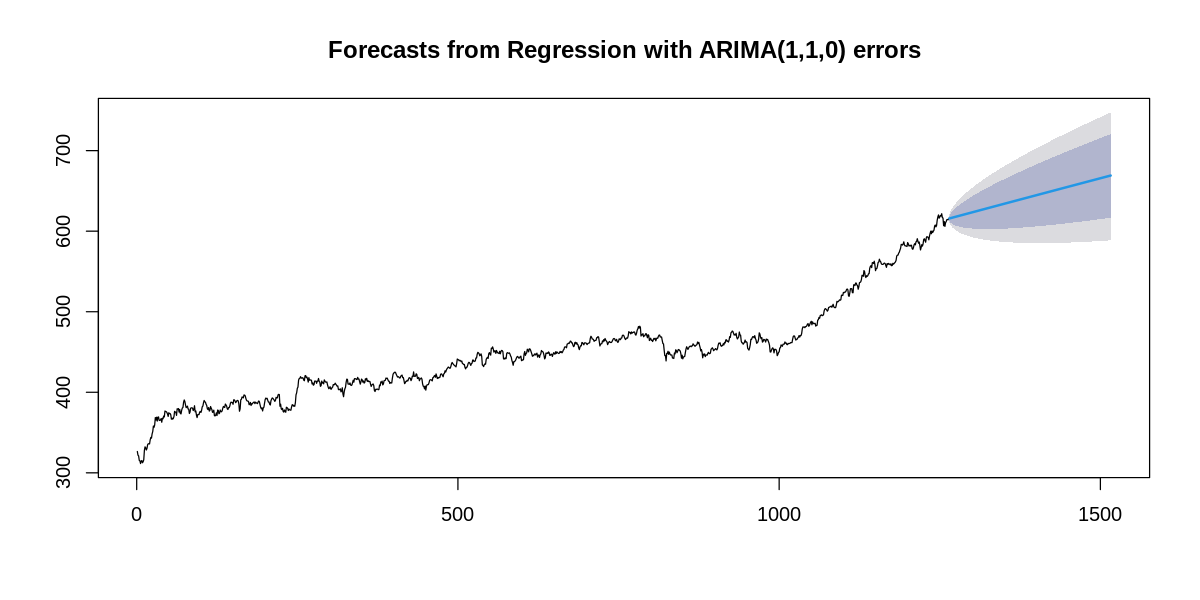

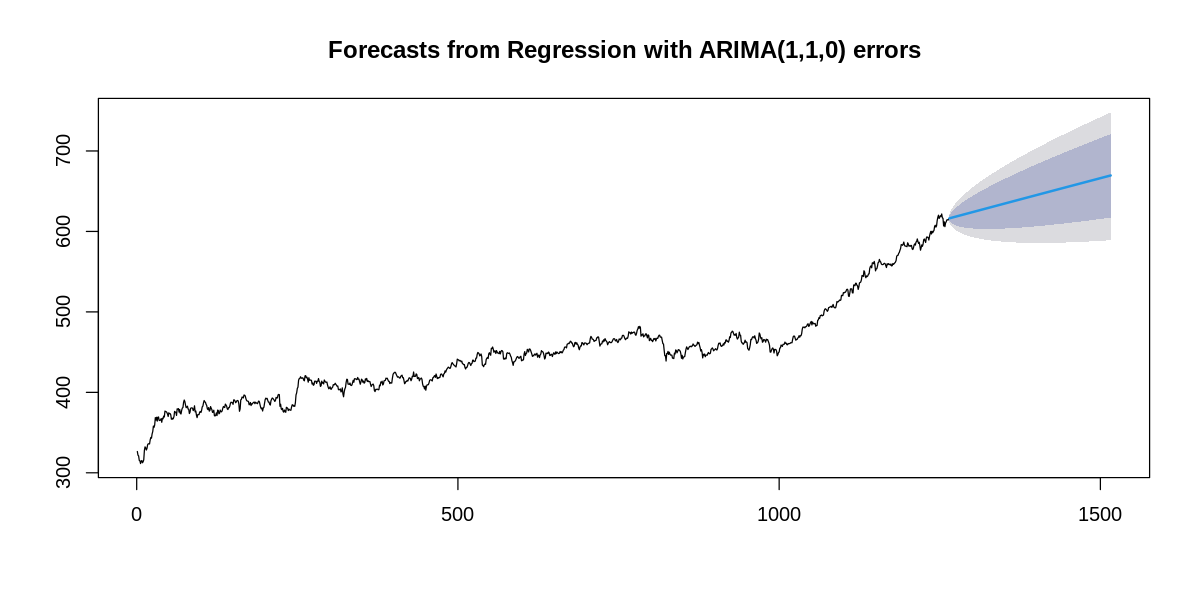

In [108]:
#par(mfrow=c(2,1))
plot(fc1)
plot(fc2)

### CV

In [60]:
#xreg <- train2n[,'snp.vol']
xreg <- train2n[,'nasdaq'] # best corr with s&p
#xreg <- train2n[,3:4]
head(xreg)

               nasdaq
1991-01-02 -0.5503244
1991-01-03 -0.5514090
1991-01-04 -0.5514782
1991-01-07 -0.5530936
1991-01-08 -0.5533706
1991-01-09 -0.5537167

In [61]:
results.m03 <- my.tsCV(train2n[,1], cv.forecast, h=hori, window=w, step=peri,
                       xreg=xreg)
m3.r2 <- n.get_result(results.m03, 'xreg:nasdaq')


 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : -14447.19
 Regression with ARIMA(0,1,0) errors : -14448.26
 Regression with ARIMA(1,1,0) errors : -14448.97
 Regression with ARIMA(0,1,1) errors : -14446.54
 Regression with ARIMA(0,1,0) errors : -14449.9
 Regression with ARIMA(1,1,1) errors : -14449.93
 Regression with ARIMA(2,1,1) errors : Inf
 Regression with ARIMA(1,1,2) errors : Inf
 Regression with ARIMA(0,1,2) errors : -14445.07
 Regression with ARIMA(2,1,0) errors : -14446.87
 Regression with ARIMA(1,1,1) errors : -14451.26
 Regression with ARIMA(0,1,1) errors : -14448.17
 Regression with ARIMA(1,1,0) errors : -14450.52
 Regression with ARIMA(2,1,1) errors : Inf
 Regression with ARIMA(1,1,2) errors : Inf
 Regression with ARIMA(0,1,2) errors : -14446.71
 Regression with ARIMA(2,1,0) errors : -14448.41
 Regression with ARIMA(2,1,2) errors : -14448.55

 Now re-fitting the best model(s) without approximations...

 Regression with ARI

In [62]:
xreg <- train2n[,3:4]
head(xreg)

               nasdaq       gold
1991-01-02 -0.5503244 -0.4390499
1991-01-03 -0.5514090 -0.4460702
1991-01-04 -0.5514782 -0.4444220
1991-01-07 -0.5530936 -0.4408813
1991-01-08 -0.5533706 -0.4386836
1991-01-09 -0.5537167 -0.4412476

In [63]:
results.m03 <- my.tsCV(train2n[,1], cv.forecast, h=hori, window=w, step=peri,
                       xreg=xreg)
m3.r3 <- n.get_result(results.m03, 'xreg:nasdaq & gold')


 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : -14446.72
 Regression with ARIMA(0,1,0) errors : -14447.01
 Regression with ARIMA(1,1,0) errors : -14448.21
 Regression with ARIMA(0,1,1) errors : -14445.49
 Regression with ARIMA(0,1,0) errors : -14448.65
 Regression with ARIMA(1,1,1) errors : -14449
 Regression with ARIMA(2,1,1) errors : Inf
 Regression with ARIMA(1,1,2) errors : Inf
 Regression with ARIMA(0,1,2) errors : -14444.08
 Regression with ARIMA(2,1,0) errors : -14446.2
 Regression with ARIMA(1,1,1) errors : Inf

 Now re-fitting the best model(s) without approximations...

 Regression with ARIMA(1,1,1) errors : Inf
 Regression with ARIMA(0,1,0) errors : -14462.98

 Best model: Regression with ARIMA(0,1,0) errors 

[1] "2 % done."

 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : -14468.25
 Regression with ARIMA(0,1,0) errors : -14461.76
 Regression with ARIMA(1,1,0) errors : -1

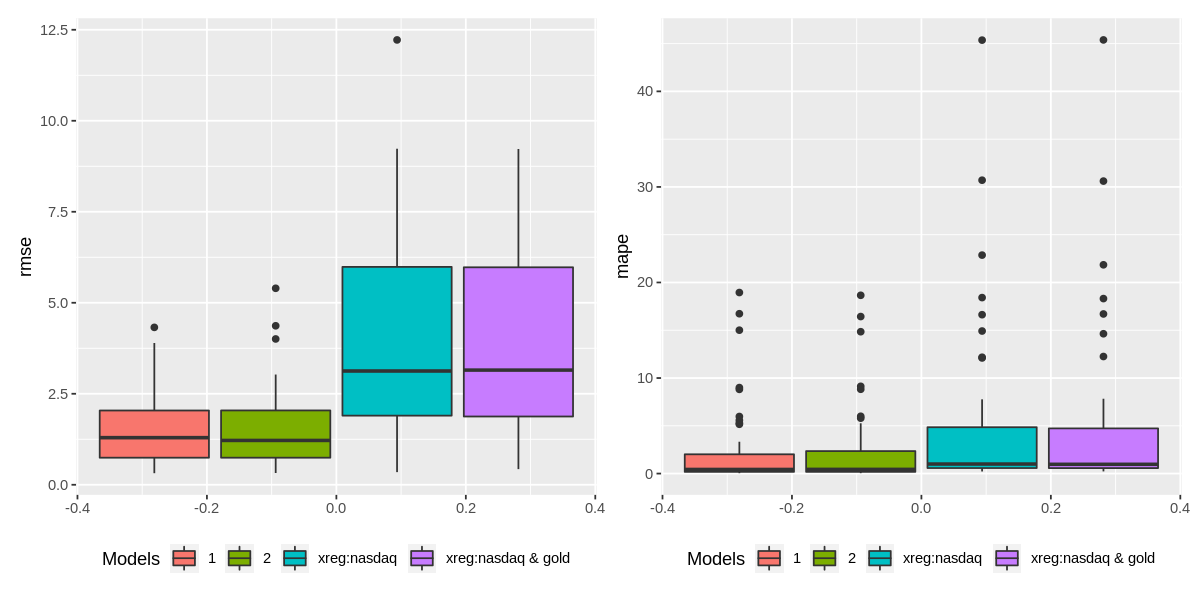

In [66]:
rn <- rbind(m1.r2, m2.r1)
rn <- rbind(rn, m3.r2)
rn <- rbind(rn, m3.r3)
n.plot_errors(rn)

In [68]:
xreg <- train2n[,2:5]
head(xreg)

              snp.vol     nasdaq       gold        wti
1991-01-02 -0.3724518 -0.5503244 -0.4390499 -0.3275023
1991-01-03 -0.3697999 -0.5514090 -0.4460702 -0.3411836
1991-01-04 -0.3699101 -0.5514782 -0.4444220 -0.3520395
1991-01-07 -0.3716948 -0.5530936 -0.4408813 -0.3167952
1991-01-08 -0.3694608 -0.5533706 -0.4386836 -0.3130775
1991-01-09 -0.3611208 -0.5537167 -0.4412476 -0.3056420

In [69]:
results.m03 <- my.tsCV(train2n[,1], cv.forecast, h=hori, window=w, step=peri,
                       xreg=xreg)
m3.r4 <- n.get_result(results.m03, 'xreg:all')


 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,0,2) errors : -14512.6
 Regression with ARIMA(0,0,0) errors : -10953.43
 Regression with ARIMA(1,0,0) errors : -14509.87
 Regression with ARIMA(0,0,1) errors : -12214.15
 Regression with ARIMA(0,0,0) errors : -8661.673
 Regression with ARIMA(1,0,2) errors : -14509.51
 Regression with ARIMA(2,0,1) errors : -14510.04
 Regression with ARIMA(3,0,2) errors : -14511.8
 Regression with ARIMA(2,0,3) errors : -14512.74
 Regression with ARIMA(1,0,3) errors : -14507.97
 Regression with ARIMA(3,0,3) errors : -14509.91
 Regression with ARIMA(2,0,4) errors : -14511.01
 Regression with ARIMA(1,0,4) errors : -14507.09
 Regression with ARIMA(3,0,4) errors : -14508.65
 Regression with ARIMA(2,0,3) errors : Inf

 Now re-fitting the best model(s) without approximations...

 Regression with ARIMA(2,0,3) errors : -14502.41

 Best model: Regression with ARIMA(2,0,3) errors 

[1] "2 % done."

 Fitting models using approximat

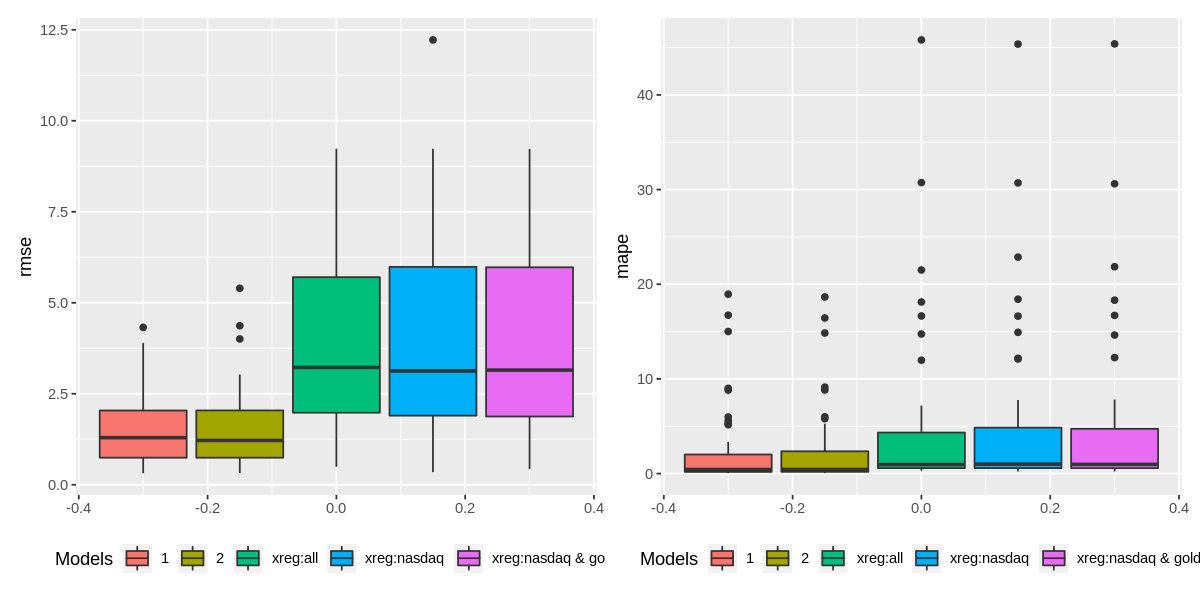

In [70]:
rn <- rbind(rn, m3.r4)
n.plot_errors(rn)

# ARIMA+GARCH

In [7]:
start <- "1991-01-01"
end <- "2020-12-31"

getSymbols("^GSPC", from=start, to=end)
spClose = Cl(GSPC)

[1] "^GSPC"

In [8]:
#train_end <- '1999-12-31'
#test_start <- '2000-01-01'
#test_end <- '2000-12-31'

train_end <- '2019-12-31'
test_start <- '2020-01-01'
test_end <- '2020-12-31'

In [9]:
hori <- 252
peri <- floor(hori/2)
w <- 252*5

lookahead <- 1

In [10]:
train <- window(spClose, end=as.Date(train_end))
test <- window(spClose, start=as.Date(test_start), end=as.Date(test_end))
#head(train); tail(train); head(test); tail(test)

In [11]:
train <- diff(log(train), lookahead)
train[as.character(head(index(train),lookahead))] <- 0

In [36]:
cv.forecast <- function(x, h) {
    forc <- ag2.forecast(x, h, out.sample=0)
    if (!is.na(forc)) {
        fc <- list(method = "ARIMA+GARCH Forecasting", mean=forc@forecast$seriesFor[,1])
        attr(fc$mean, "names") <- NULL
        return(fc)
    }
}

In [37]:
results <- my.tsCV(train, cv.forecast, h=hori, window=w, step=peri)

[1] "2 % done."
[1] "4 % done."
[1] "6 % done."
[1] "8 % done."
[1] "10 % done."
[1] "12 % done."
[1] "GARCH model does not converge"
[1] "15 % done."
[1] "17 % done."
[1] "19 % done."
[1] "21 % done."
[1] "23 % done."
[1] "25 % done."
[1] "27 % done."
[1] "29 % done."
[1] "31 % done."
[1] "33 % done."
[1] "35 % done."
[1] "38 % done."
[1] "40 % done."
[1] "42 % done."
[1] "44 % done."
[1] "46 % done."
[1] "48 % done."
[1] "50 % done."
[1] "52 % done."
[1] "54 % done."
[1] "56 % done."
[1] "58 % done."
[1] "60 % done."
[1] "GARCH model does not converge"
[1] "62 % done."
[1] "GARCH model does not converge"
[1] "65 % done."
[1] "67 % done."
[1] "69 % done."
[1] "71 % done."
[1] "73 % done."
[1] "75 % done."
[1] "77 % done."
[1] "79 % done."
[1] "81 % done."
[1] "83 % done."
[1] "85 % done."
[1] "88 % done."
[1] "90 % done."
[1] "92 % done."
[1] "94 % done."
[1] "96 % done."
[1] "98 % done."
[1] "100 % done."


In [40]:
if (sum(!is.na(results)) == 0) {
    print('no result available')
}

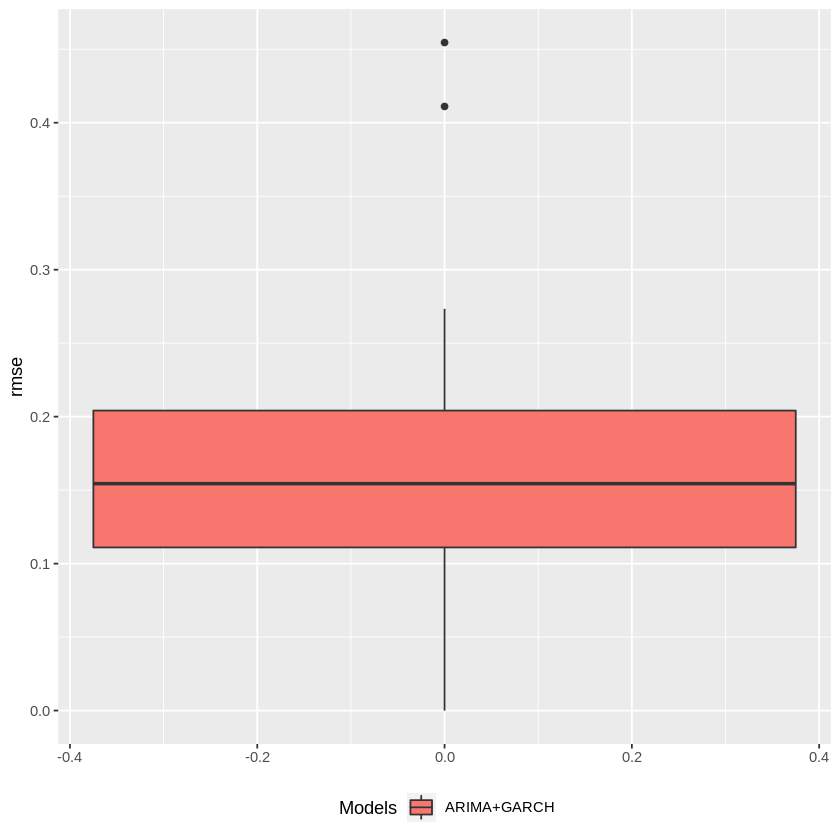

In [39]:
m <- n.get_result(results, 'ARIMA+GARCH')
n.plot_errors(m, metrics=c('rmse'))

# Gradient Boosting

# Model Comparision